In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [4]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop Nan values before plotting

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [7]:
df_Da_US_group = df_DA_US.groupby('job_skills').agg(
    count=('job_skills','count'),
    median=('salary_year_avg','median')
)
df_Da_US_group

#Or u can write below code

# df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [8]:
df_DA_top_pay = df_Da_US_group.sort_values(by='median',ascending=False).head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [9]:
df_DA_skills = df_Da_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


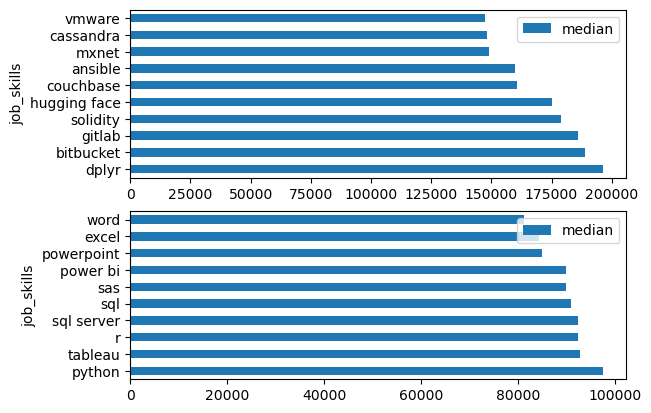

In [10]:
fig , ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0])
df_DA_skills.plot(kind='barh',y='median',ax=ax[1])
plt.show()

In [17]:
#The problem with above second plot is we sorted it with count but plotted it with median,so after sorting it
# with count, do it with median

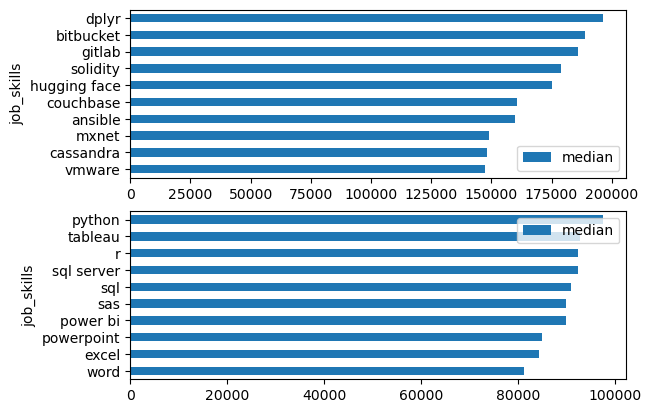

In [11]:
fig , ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0])
ax[0].invert_yaxis() 
# or u can just do df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])
df_DA_skills.plot(kind='barh',y='median',ax=ax[1])
ax[1].invert_yaxis() 
plt.show()

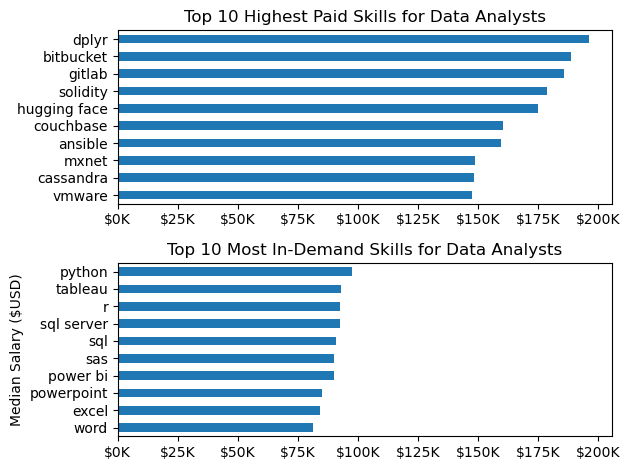

In [13]:
#Now we want the x axis limit to be the same

fig , ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].invert_yaxis() 
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

# or u can just do df_DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0])
df_DA_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())
#Or you can execute below two lines
# ax[1].set_xlim(0,200000)
# ax[0].set_xlim(0,200000)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].invert_yaxis() 
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()